In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
filename='SAIL.NS.csv'  #change filename
df=pd.read_csv(filename)

In [85]:
print(df.head)
print(df.shape)

<bound method NDFrame.head of             Date        Open        High  ...       Close   Adj Close      Volume
0     2010-01-04  240.699997  249.399994  ...  247.600006  207.032440  41185530.0
1     2010-01-05  252.000000  257.000000  ...  254.550003  212.843765  42852660.0
2     2010-01-06  255.550003  267.000000  ...  248.350006  207.659561  49076680.0
3     2010-01-07  250.000000  253.300003  ...  241.600006  202.015549  70265120.0
4     2010-01-08  242.000000  243.600006  ...  238.850006  199.716095  51182970.0
...          ...         ...         ...  ...         ...         ...         ...
2463  2019-12-23   41.450001   42.099998  ...   41.000000   40.355347  26796488.0
2464  2019-12-24   41.000000   41.450001  ...   41.000000   40.355347  21261677.0
2465  2019-12-26   41.250000   42.799999  ...   42.400002   41.733334  40946850.0
2466  2019-12-27   42.450001   42.700001  ...   42.150002   41.487267  18880983.0
2467  2019-12-30   42.200001   43.349998  ...   43.099998   42.42232

In [86]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [87]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Adj Close'])
print(new_data)

     Date Adj Close
0     NaN       NaN
1     NaN       NaN
2     NaN       NaN
3     NaN       NaN
4     NaN       NaN
...   ...       ...
2463  NaN       NaN
2464  NaN       NaN
2465  NaN       NaN
2466  NaN       NaN
2467  NaN       NaN

[2468 rows x 2 columns]


In [88]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Adj Close'][i] = data['Adj Close'][i]
new_data = new_data.dropna(how='any',axis=0)


In [89]:
print(new_data)

                     Date Adj Close
0     2010-01-04 00:00:00   207.032
1     2010-01-05 00:00:00   212.844
2     2010-01-06 00:00:00    207.66
3     2010-01-07 00:00:00   202.016
4     2010-01-08 00:00:00   199.716
...                   ...       ...
2463  2019-12-23 00:00:00   40.3553
2464  2019-12-24 00:00:00   40.3553
2465  2019-12-26 00:00:00   41.7333
2466  2019-12-27 00:00:00   41.4873
2467  2019-12-30 00:00:00   42.4223

[2460 rows x 2 columns]


In [90]:
#split into train and validation
train_len= int(0.8*len(data))
train = new_data[:train_len]
valid = new_data[train_len:]
# print(train.shape)
# print(valid.shape)


In [91]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Adj Close'][len(train)-480+i:].sum() + sum(preds)
    b = a/488
    preds.append(b)



In [92]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Adj Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
18.48042550376869


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


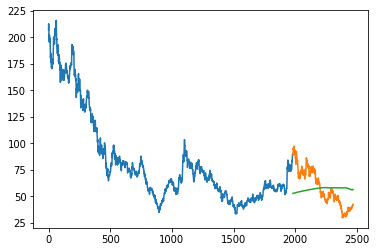

In [93]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])